<a href="https://colab.research.google.com/github/Hamza-Chekireb/Artificial-Intelligence-Data-Science-Data-Analysis-Portfolio/blob/main/Decision_Tree_%26_Random_Forest_Titanic_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
df = pd.read_csv("/content/titanic-passengers (2).csv", sep=";")

# Création d'une fonction de Preprocessing de la base de données brute

def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(), inplace = True)
    new_data.replace({'Sex':{'male': 1,'female':0}}, inplace = True)
    new_data.replace({'Survived':{'Yes': 1,'No':0}}, inplace = True)
    new_data.fillna('S',inplace = True)
    new_data.drop(['Cabin'], inplace = True, axis = 1)
    return new_data

data=preprocess_data(df)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


### Importer les fonctions et bibliothèques 
### 

In [ ]:
# Train, test split
from sklearn.model_selection import train_test_split
# les modèles de classification  
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier

# Une métrique de calcul de performance  
from sklearn.metrics import accuracy_score


In [ ]:
# Targets, features split
# Enlever les caractéristiques 
x = data.drop(["Survived", "Name", "Ticket", "Embarked"], axis=1)
y = data["Survived"]

#division de données en données d'entrainement et données de test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=7)

#Application de l'algorithme de Tree decision
model = DecisionTreeClassifier()  
# Calibrer le modèle
model.fit(x_train, y_train)   

# Le test et l'évaluation du modèle 
y_pred=model.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.8156424581005587


### 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.
### 

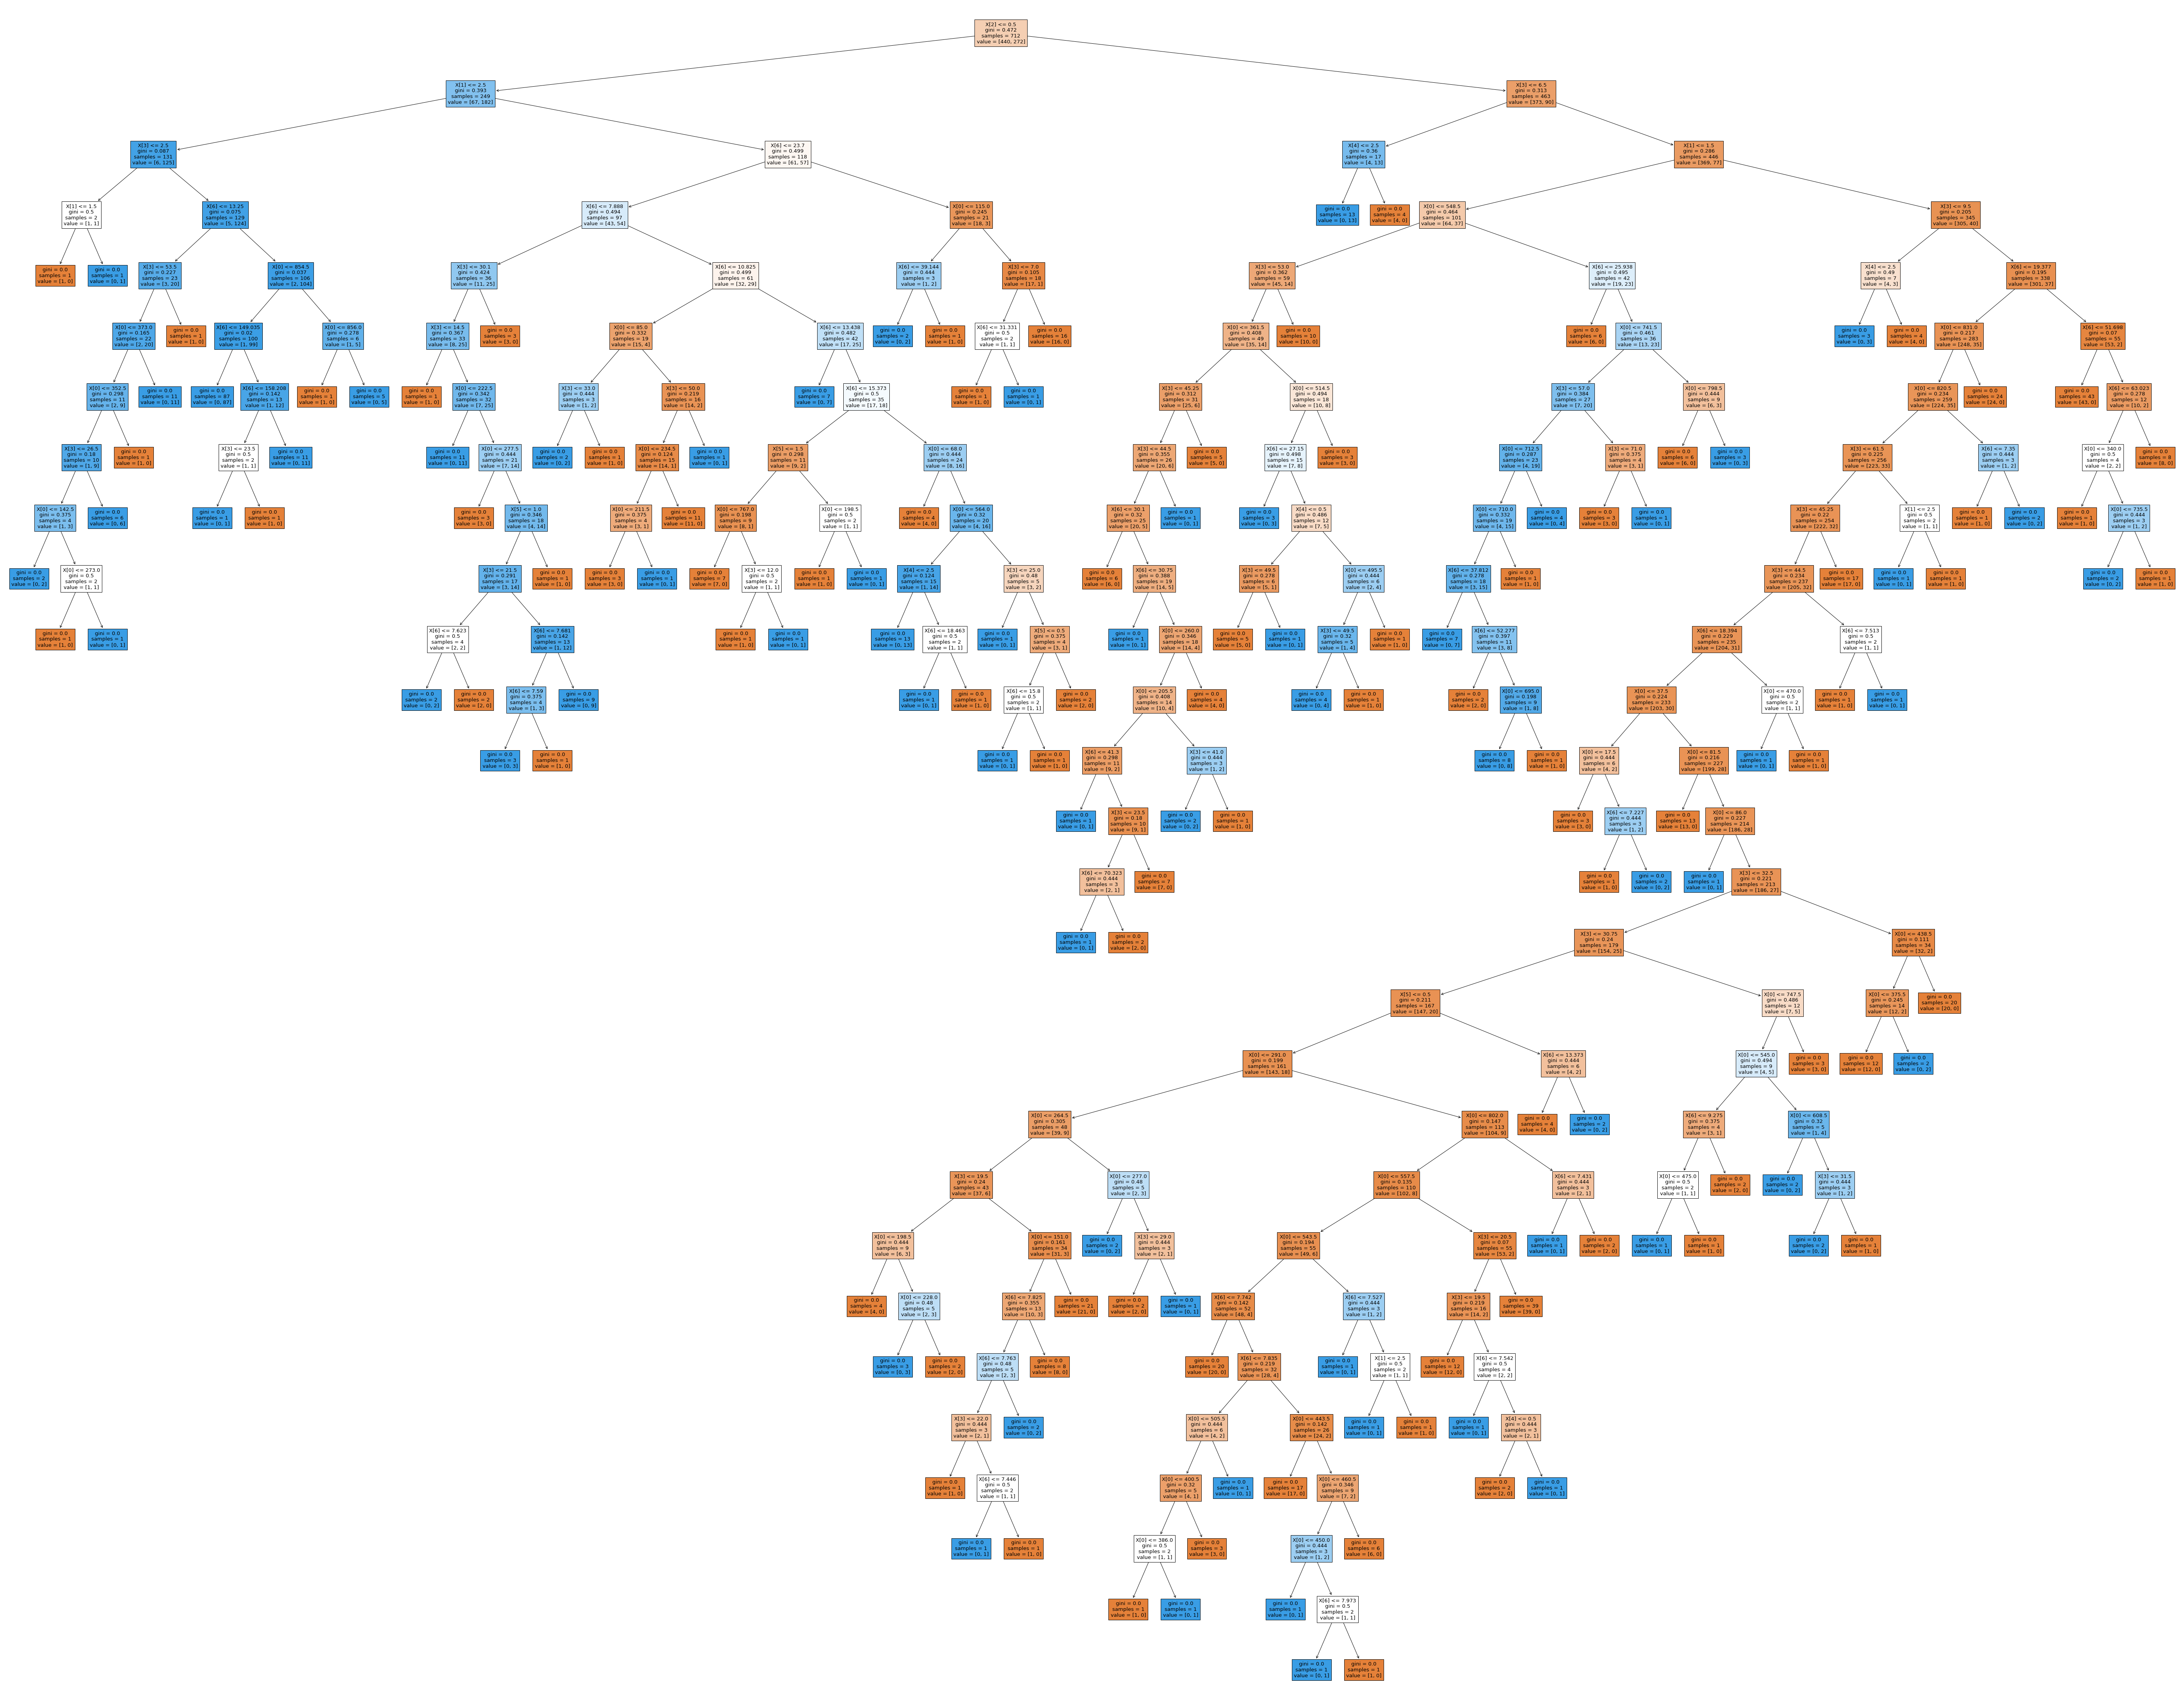

In [ ]:
import sklearn
import tree
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(100,80))
_ = sklearn.tree.plot_tree(model, filled=True)

### 3. Change the decision tree parameters(change at least two parameters), 
### 4. Calculate the new accuracy and compare it with the previous results. 
### 


In [ ]:
# Optimisation de l'arbre de décision en utilisant GridSearch pour chercher les 
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV
max_depth = [1,100]
min_samples_leaf = [1,50]
max_leaf_nodes = [1,50]
max_features = [1,7]
criterion = [ "gini", "entropy"]
parameters = {'criterion':criterion,
             'max_depth':max_depth,
              'min_samples_split':min_samples_leaf,'max_leaf_nodes':max_leaf_nodes,
              'max_features':max_features}

GS = GridSearchCV(DecisionTreeClassifier(),parameters)

GS.fit(x_train,y_train)


GS.best_estimator_

DecisionTreeClassifier(max_depth=1, max_features=7, max_leaf_nodes=50,
                       min_samples_split=50)

In [ ]:
#Application de l'algorithme de Tree decision avec les meilleurs paramètres 

model_bp = DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features=7, max_leaf_nodes=50,
                       min_samples_split=50)  
# Calibrer le modèle
model_bp.fit(x_train, y_train)   

# Le test et l'évaluation du modèle 
y_pred=model_bp.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8156424581005587


### On ne remarque pas une grande différence dans l'accuracy_score

### 5. Use random forest then change the number of estimators
### 6. Calculate the new accuracy and compare it with the previous result.



In [ ]:
# Importer les bibliothèques importantes 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics   

'''
#Extraction des caractéristiques
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#division de données en données d'entrainement et données de test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=7)'''

max_depth = list(range(1,30,2))
min_samples_leaf = list(range(1,50,2))
max_leaf_nodes = list(range(1,50,2))
n_estimators = list(range(0,30,2))
parameters = {'criterion':criterion,
             'max_depth':max_depth,
              'min_samples_split':min_samples_leaf,'max_leaf_nodes':max_leaf_nodes,
              'max_features':max_features}

GS = GridSearchCV(RandomForestClassifier(),parameters)

GS.fit(x_train,y_train)


GS.best_estimator_

In [ ]:

#Création de RandomForest avec 10 decision tree
clf=RandomForestClassifier(n_estimators=10) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model
